In [6]:
import sys
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
current_directory = os.getcwd()
model_path = os.path.join(os.path.dirname(current_directory), 'model')
sys.path.insert(0, model_path)

In [1]:
import np_functions
import np_init
import np_loss
import np_infer
import np_learn
import np_forward

ModuleNotFoundError: No module named 'np_functions'

# Normal Pred Code

In [23]:
parameters = {
    "itr":100,
    "l_rate":0.2, 
    "epochs":100,
    "beta":0.2,
    "act_type": "RELU",
    "alpha": 1, 
    "neurons": [2,3,1], 
    "variance": [1,1,10]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

In [24]:
in_data = np.array([[0,0],[0,1],[1,0],[1,1]])
out_data = np.array([1,0,0,1])


100%|██████████| 100/100 [00:00<00:00, 116.75it/s]


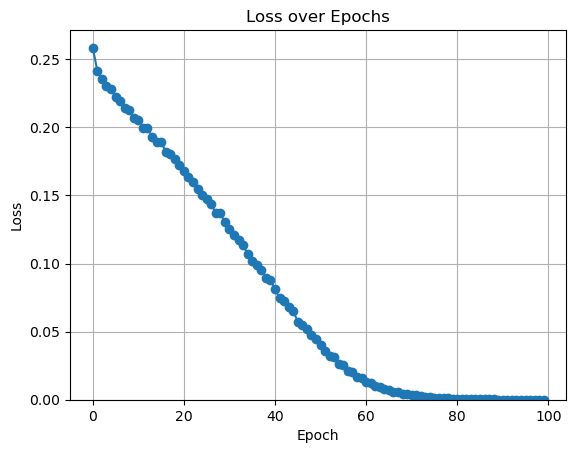

100%|██████████| 100/100 [00:00<00:00, 115.41it/s]


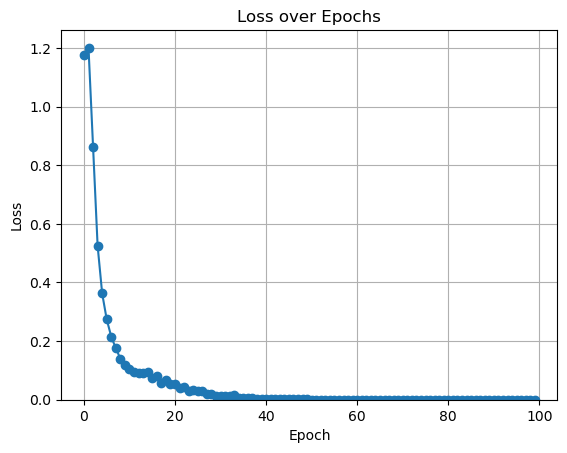

100%|██████████| 100/100 [00:00<00:00, 114.58it/s]


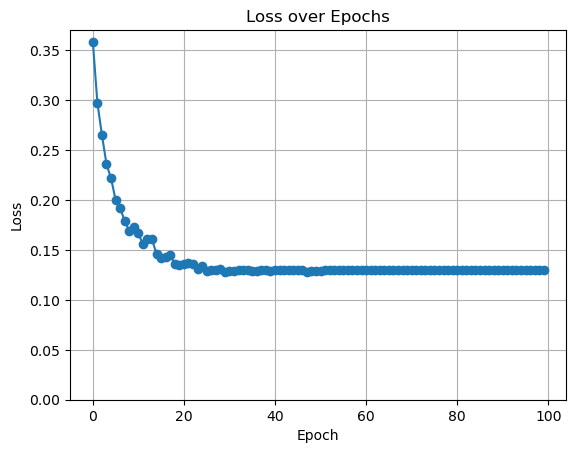

100%|██████████| 100/100 [00:00<00:00, 114.75it/s]


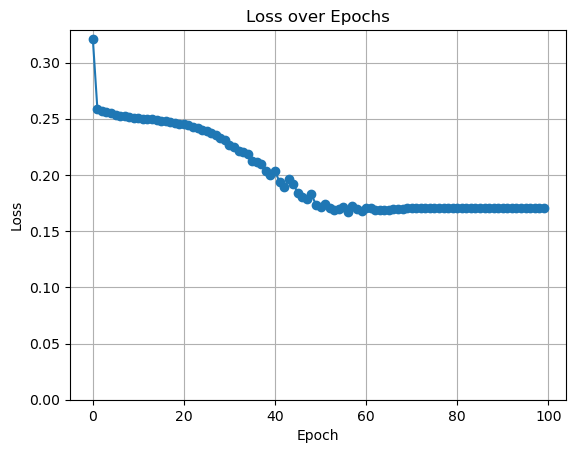

100%|██████████| 100/100 [00:00<00:00, 111.62it/s]


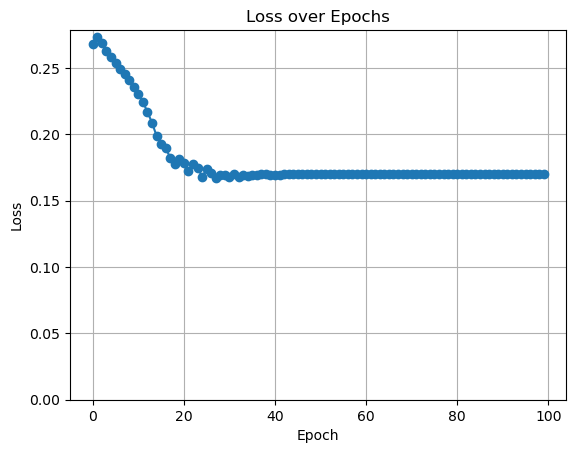

100%|██████████| 100/100 [00:00<00:00, 114.40it/s]


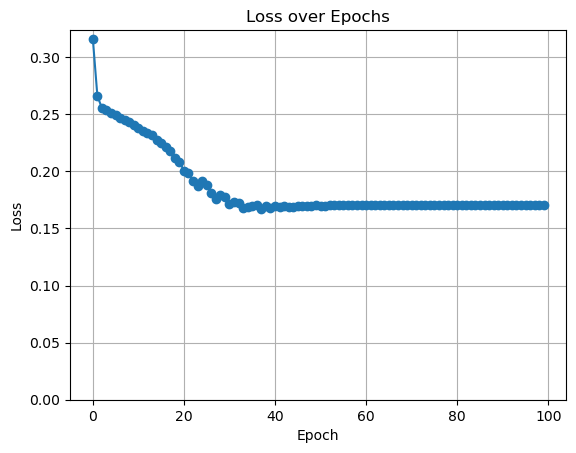

100%|██████████| 100/100 [00:00<00:00, 116.85it/s]


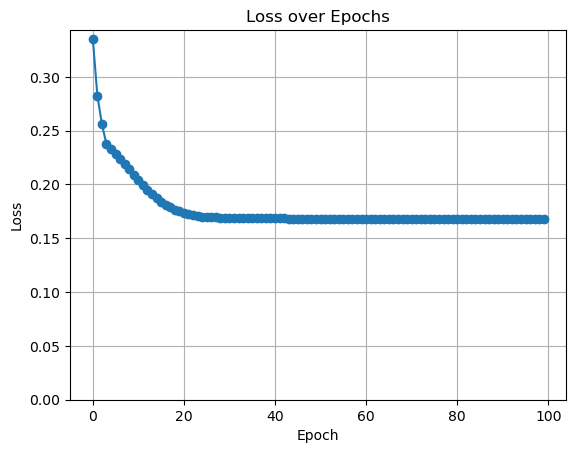

100%|██████████| 100/100 [00:00<00:00, 116.34it/s]


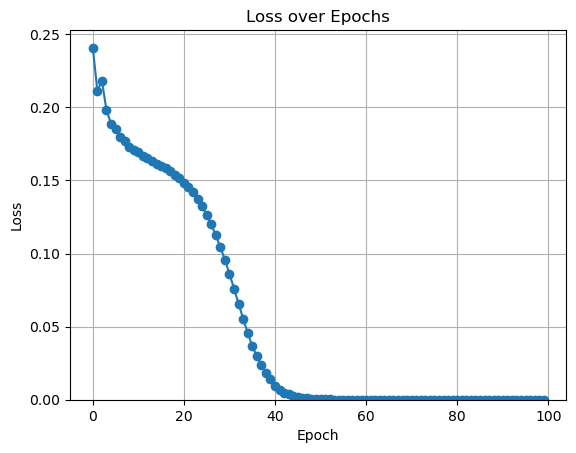

100%|██████████| 100/100 [00:00<00:00, 112.34it/s]


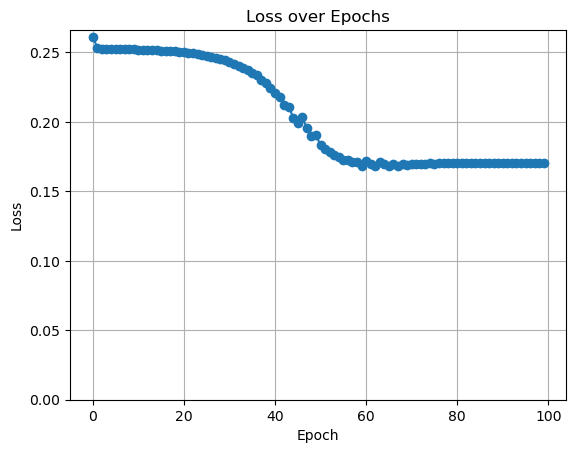

100%|██████████| 100/100 [00:00<00:00, 113.34it/s]


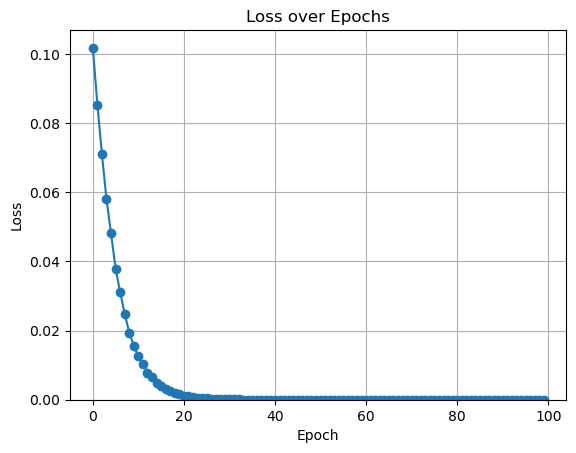

In [25]:
for _ in range(0,10):
  w,b = np_init.initializer(parameters["neurons"], "xavier")
  loss_values = []

  for i in tqdm(range(parameters["epochs"])):
    np_learn.learn(in_data,out_data, w ,b, parameters)
    predicted = []
    for data in in_data:
        pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
        predicted.append(pred)

    predicted = np.array(predicted)
    mse = np_loss.MSE_error(out_data, predicted)
    loss_values.append(mse)

  plt.plot(range(len(loss_values)), loss_values, '-o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss over Epochs')
  plt.ylim(bottom=0)
  plt.grid()
  plt.show()

# Incremental Pred Code

In [ ]:
import iPC_learn

In [32]:
parameters = {
    "itr":1,
    "l_rate":0.2, 
    "epochs":100,
    "beta":0.2,
    "act_type": "RELU",
    "alpha": 1, 
    "neurons": [2,3,1], 
    "variance": [1,1,10]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 1675.74it/s]


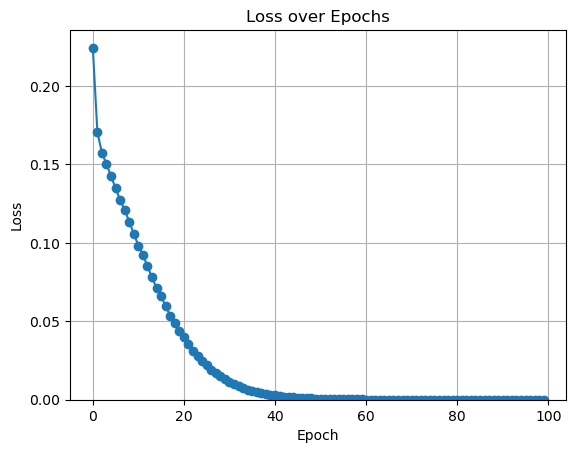

100%|██████████| 100/100 [00:00<00:00, 2085.50it/s]


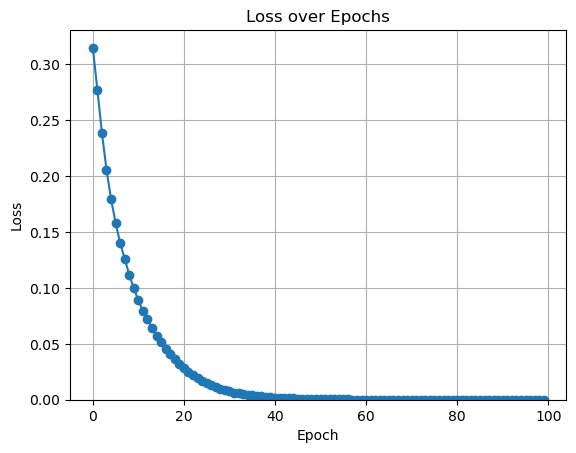

100%|██████████| 100/100 [00:00<00:00, 1931.25it/s]


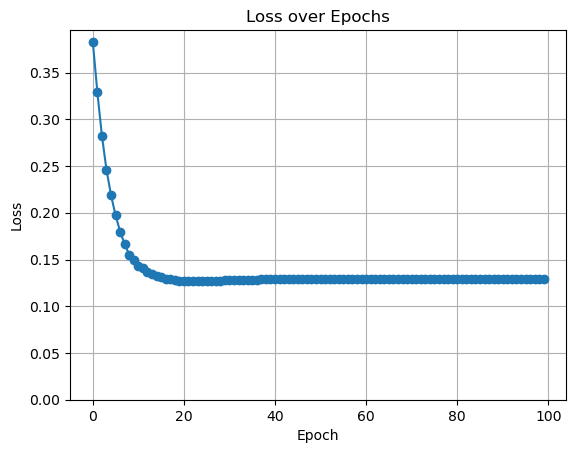

100%|██████████| 100/100 [00:00<00:00, 1957.06it/s]


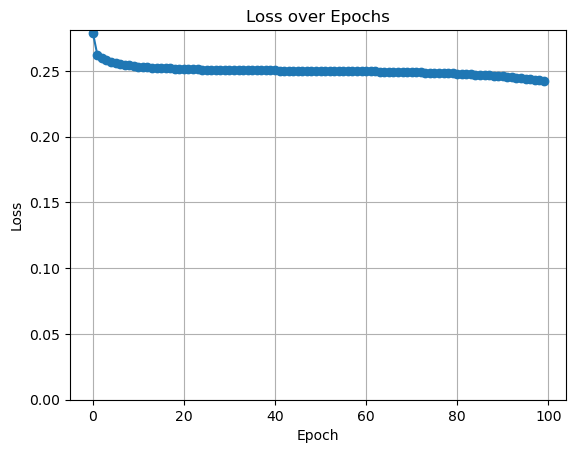

100%|██████████| 100/100 [00:00<00:00, 2298.21it/s]


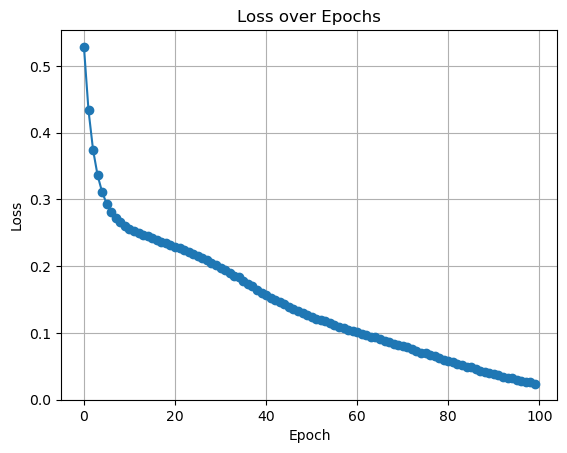

100%|██████████| 100/100 [00:00<00:00, 2156.75it/s]


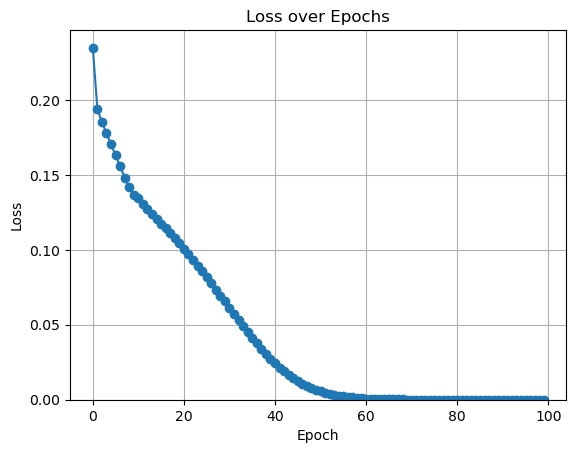

100%|██████████| 100/100 [00:00<00:00, 2422.53it/s]


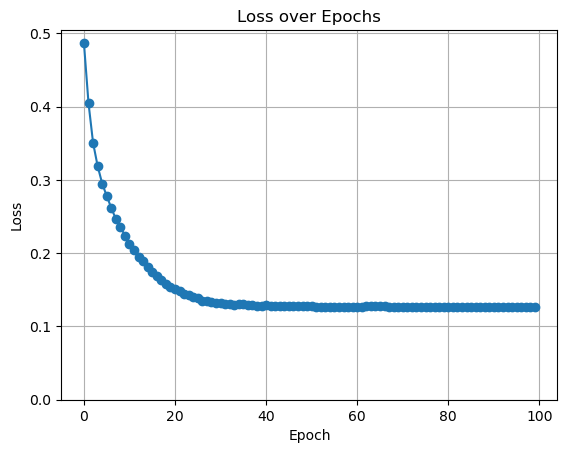

100%|██████████| 100/100 [00:00<00:00, 1991.80it/s]


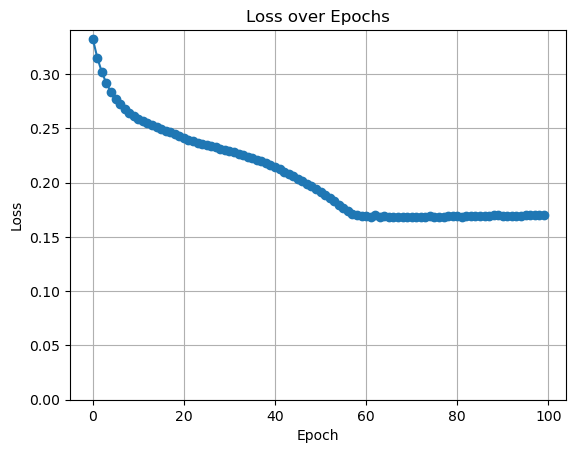

100%|██████████| 100/100 [00:00<00:00, 1952.36it/s]


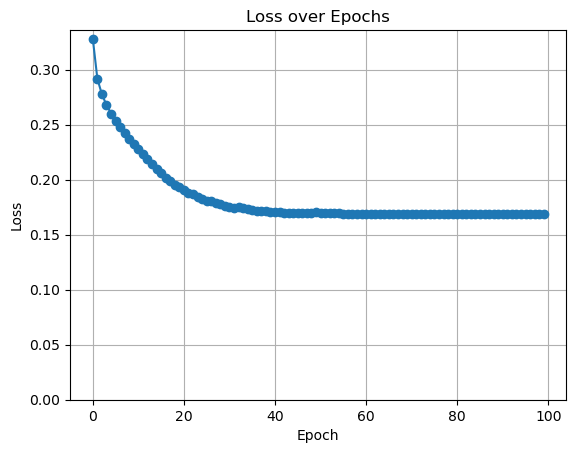

100%|██████████| 100/100 [00:00<00:00, 2072.33it/s]


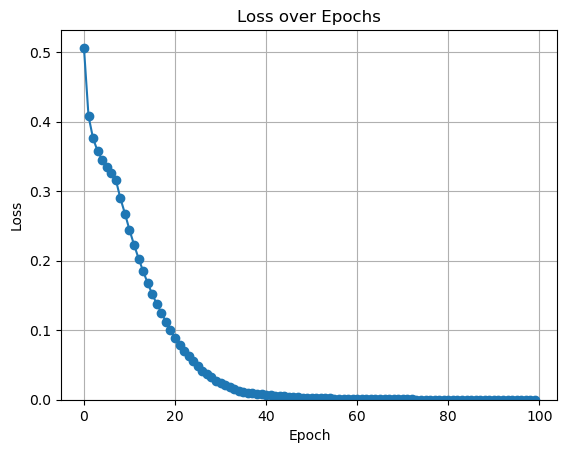

In [33]:
for _ in range(0,10):
  w,b = np_init.initializer(parameters["neurons"], "xavier")
  loss_values = []

  for i in tqdm(range(parameters["epochs"])):
    np_learn.learn(in_data,out_data, w ,b, parameters)
    predicted = []
    for data in in_data:
        pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
        predicted.append(pred)

    predicted = np.array(predicted)
    mse = np_loss.MSE_error(out_data, predicted)
    loss_values.append(mse)

  plt.plot(range(len(loss_values)), loss_values, '-o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss over Epochs')
  plt.ylim(bottom=0)
  plt.grid()
  plt.show()

In [29]:
### Gotta make sure I am doing this right (I don't think so)

### Don't see much of a hyperparam stability effect but the speed gain is insane!